C:\Users\ojbsn\.conda\envs\quantum_env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ojbsn\.conda\envs\quantum_env\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ojbsn\.conda\envs\quantum_env\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


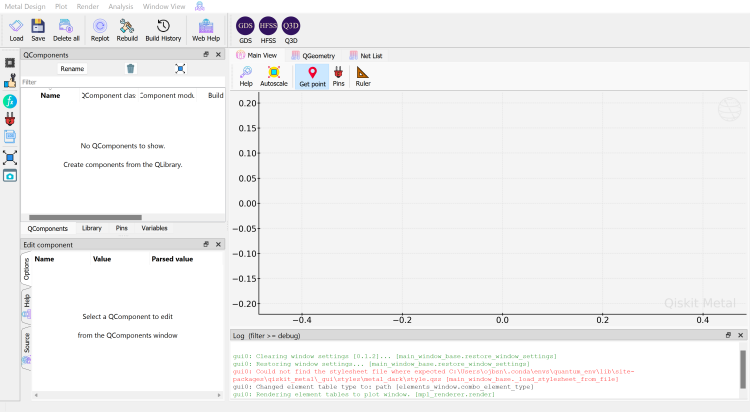

In [1]:
import numpy as np
import qiskit_metal as metal
from qiskit_metal import designs, draw, MetalGUI, Dict, open_docs

#design.overwrite_enabled = True
#design.chips.main
#design.chips.main.size.size_x = '11mm'
#design.chips.main.size.size_y = '9mm'

# To launch the qiskit metal GUI,use the method MetalGUI.
design = designs.DesignPlanar()
gui = MetalGUI(design)
gui.screenshot()

In [2]:
%metal_heading Connecting QPins with coplanar waveguides (CPWs)

In [3]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

# Allow running the same cell here multiple times to overwrite changes
design.overwrite_enabled = True

## Custom options for all the transmons
options = dict(
    # Some options we want to modify from the deafults
    # (see below for defaults)
    pad_width = '425 um', 
    pocket_height = '650um',
    # Adding 4 connectors (see below for defaults)
    connection_pads=dict( 
        a = dict(loc_W=+1,loc_H=+1), 
        b = dict(loc_W=-1,loc_H=+1, pad_height='30um'),
        c = dict(loc_W=+1,loc_H=-1, pad_width='200um'),
        d = dict(loc_W=-1,loc_H=-1, pad_height='50um')
    )
)

## Create 4 transmons

q1 = TransmonPocket(design, 'Q1', options = dict(
    pos_x='+2.55mm', pos_y='+0.0mm', **options))
q2 = TransmonPocket(design, 'Q2', options = dict(
    pos_x='+0.0mm', pos_y='-0.9mm', orientation = '90', **options))
q3 = TransmonPocket(design, 'Q3', options = dict(
    pos_x='-2.55mm', pos_y='+0.0mm', **options))
q4 = TransmonPocket(design, 'Q4', options = dict(
    pos_x='+0.0mm', pos_y='+0.9mm', orientation = '90', **options))

## Rebuild the design
gui.rebuild()
gui.autoscale()

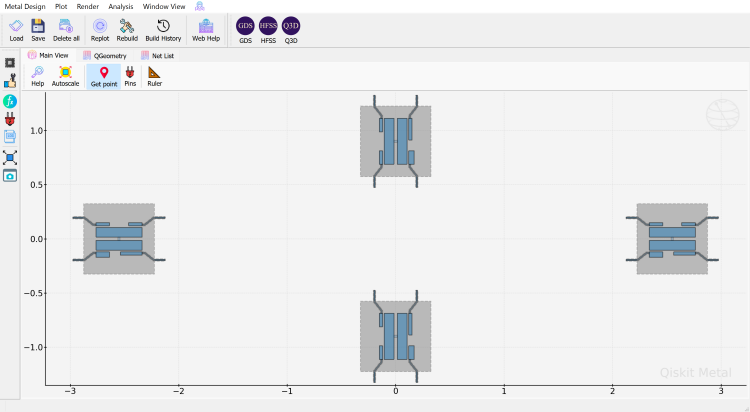

In [4]:
gui.toggle_docks(True)
gui.screenshot()

In [5]:
# Import the basic cpw QComponent from the QLibrary. It is a class called RouteMeander. We can see its default options using RouteMeander.get_template_options(design)
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
RouteMeander.get_template_options(design)

{'chip': 'main',
 'layer': '1',
 'pin_inputs': {'start_pin': {'component': '', 'pin': ''},
  'end_pin': {'component': '', 'pin': ''}},
 'fillet': '0',
 'lead': {'start_straight': '0mm',
  'end_straight': '0mm',
  'start_jogged_extension': '',
  'end_jogged_extension': ''},
 'total_length': '7mm',
 'trace_width': 'cpw_width',
 'meander': {'spacing': '200um', 'asymmetry': '0um'},
 'snap': 'true',
 'prevent_short_edges': 'true',
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False,
 'aedt_q3d_wire_bonds': False,
 'aedt_hfss_wire_bonds': False}

In [6]:
options = Dict(
    meander=Dict(
        lead_start='0.1mm',
        lead_end='0.1mm',
        asymmetry='0 um')
)


def connect(component_name: str, component1: str, pin1: str, component2: str, pin2: str,
            length: str,
            asymmetry='0 um', flip=False):
    """Connect two pins with a CPW."""
    myoptions = Dict(
        pin_inputs=Dict(
            start_pin=Dict(
                component=component1,
                pin=pin1),
            end_pin=Dict(
                component=component2,
                pin=pin2)),
        lead=Dict(
            start_straight='0.13mm'
        ),
        total_length=length,
    fillet = '90um')
    myoptions.update(options)
    myoptions.meander.asymmetry = asymmetry
    myoptions.meander.lead_direction_inverted = 'true' if flip else 'false'
    return RouteMeander(design, component_name, myoptions)


asym = 150
cpw1 = connect('cpw1', 'Q1', 'd', 'Q2', 'c', '6.0 mm', f'+{asym}um')
cpw2 = connect('cpw2', 'Q3', 'c', 'Q2', 'a', '6.1 mm', f'-{asym}um', flip=True)
cpw3 = connect('cpw3', 'Q3', 'a', 'Q4', 'b', '6.0 mm', f'+{asym}um')
cpw4 = connect('cpw4', 'Q1', 'b', 'Q4', 'd', '6.1 mm', f'-{asym}um', flip=True)

gui.rebuild()
gui.autoscale()

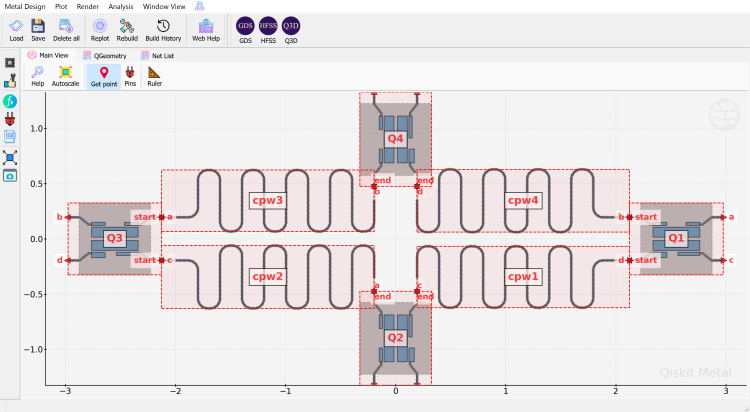

In [7]:
gui.toggle_docks(True)
gui.highlight_components(['Q1','Q2','Q3','Q4','cpw1','cpw2','cpw3','cpw4'])
gui.screenshot()

In [8]:
design.components.keys()

['Q1', 'Q2', 'Q3', 'Q4', 'cpw1', 'cpw2', 'cpw3', 'cpw4']

In [9]:
# We can access the created CPW from the design too.
design.components.cpw2

name:    cpw2
class:   RouteMeander          
options: 
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'pin_inputs'        : {
       'start_pin'         : {
            'component'         : 'Q3',                         
            'pin'               : 'c',                          
                             },
       'end_pin'           : {
            'component'         : 'Q2',                         
            'pin'               : 'a',                          
                             },
                        },
  'fillet'            : '90um',                       
  'lead'              : {
       'start_straight'    : '0.13mm',                     
       'end_straight'      : '0mm',                        
       'start_jogged_extension': '',                           
       'end_jogged_extension': '',                           
                        },
  'total_length'      : '6.1 mm',        

In [10]:
# The design can have variables, which can be used in the component options.
design.variables.cpw_width = '10um'
design.variables.cpw_gap = '6um'
gui.rebuild()

In [11]:
# Ex: we can all qubit pads using the variables.
cpw1.options.lead.end_straight = '100um'
cpw2.options.lead.end_straight = '100um'
cpw3.options.lead.end_straight = '100um'
cpw4.options.lead.end_straight = '100um'

In [12]:
# Set variables in the design
design.variables.pad_width = '450 um'
design.variables.cpw_width = '25 um'
design.variables.cpw_gap = '12 um'

# Assign variables to component options
q1.options.pad_width = 'pad_width'
q2.options.pad_width = 'pad_width'
q3.options.pad_width = 'pad_width'
q4.options.pad_width = 'pad_width'

# Rebuild all compoinent and refresh the gui 
gui.rebuild()
gui.autoscale()

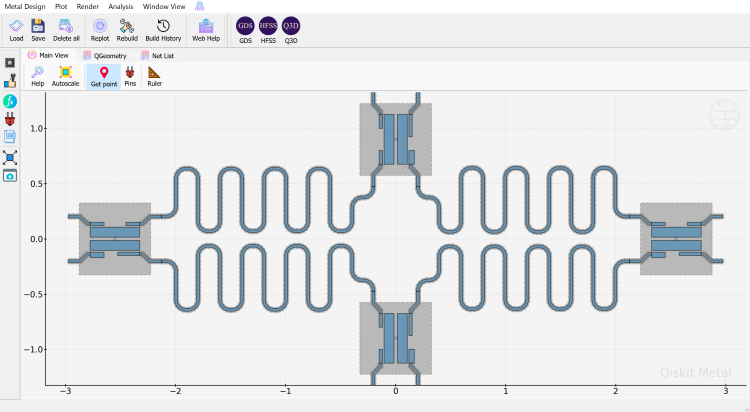

In [13]:
gui.screenshot()

In [14]:
%metal_heading Render to GDS

In [15]:
gds = design.renderers.gds
gds.options.path_filename

'../resources/Fake_Junctions.GDS'

In [16]:
gds.options.path_filename = '../resources/Fake_Junctions.GDS'

In [17]:
q1.options


{'pos_x': '+2.55mm',
 'pos_y': '+0.0mm',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'connection_pads': {'a': {'pad_gap': '15um',
   'pad_width': '125um',
   'pad_height': '30um',
   'pad_cpw_shift': '5um',
   'pad_cpw_extent': '25um',
   'cpw_width': 'cpw_width',
   'cpw_gap': 'cpw_gap',
   'cpw_extend': '100um',
   'pocket_extent': '5um',
   'pocket_rise': '65um',
   'loc_W': 1,
   'loc_H': 1},
  'b': {'pad_gap': '15um',
   'pad_width': '125um',
   'pad_height': '30um',
   'pad_cpw_shift': '5um',
   'pad_cpw_extent': '25um',
   'cpw_width': 'cpw_width',
   'cpw_gap': 'cpw_gap',
   'cpw_extend': '100um',
   'pocket_extent': '5um',
   'pocket_rise': '65um',
   'loc_W': -1,
   'loc_H': 1},
  'c': {'pad_gap': '15um',
   'pad_width': '200um',
   'pad_height': '30um',
   'pad_cpw_shift': '5um',
   'pad_cpw_extent': '25um',
   'cpw_width': 'cpw_width',
   'cpw_gap': 'cpw_gap',
   'cpw_extend': '100um',
   'pocket_extent': '5um',
   'pocket_rise': '65um',
   'loc_W': 1,
   'loc_H

In [18]:
gds.options.path_filename = "../resources/Fake_Junctions.GDS"

In [19]:
# Not sure what's going on here, however the GDS file is downloadable from the Qiskit Metal GUI.
design.renderers.gds.export_to_gds("4-Transmon_design.gds")

08:03AM 56s WARNING [_import_junction_gds_file]: Not able to find file:"../resources/Fake_Junctions.GDS".  Not used to replace junction. Checked directory:"C:\Users\ojbsn\OneDrive\Desktop___________\Documents\Documents\resources".


1

In [20]:
# Basic and crazy shapes.
# See their source code to see how to get started on a few simple examples.
from qiskit_metal.qlibrary.sample_shapes.n_square_spiral import NSquareSpiral
# print(NSquareSpiral.get_template_options(design))
ops = {
    'n': '10',
    'width': '5um',
    'radius': '100um',
    'gap': '22um',
    'pos_x': '0.65mm',
    'pos_y': '2.2mm',
    'orientation': '0',
    'subtract': 'False'}
NSquareSpiral(design, 'spiral', ops)
NSquareSpiral(design, 'spiral_cut', {**ops, **dict(subtract=True, width='22um', gap='10um')})
gui.rebuild()

In [21]:
# To see source, try ??NSquareSpiral. Go to the actual source file and edit it, copy it, or edit it in the GUI using the Edit Source button.


In [22]:
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
# CpwStraightLine.get_template_options(design)
myoptions = Dict(
        pin_inputs=Dict(
            start_pin=Dict(
                component='Q4',
                pin='c'),
            end_pin=Dict(
                component='spiral',
                pin='spiralPin'))
        )


RouteStraight(design, 'cpw_s1', myoptions);
gui.rebuild()

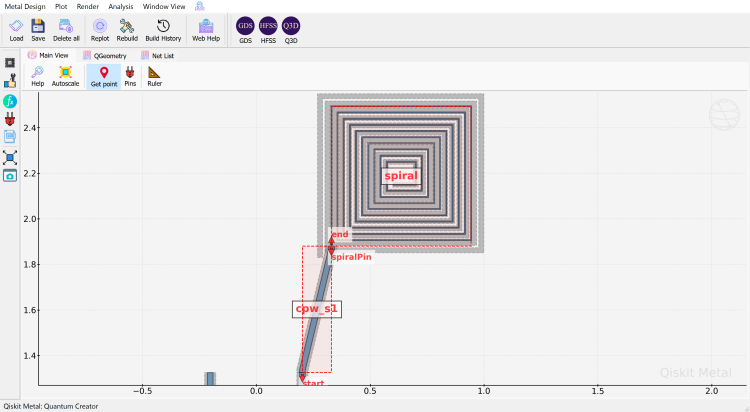

In [23]:
qcomponents = ['spiral', 'cpw_s1']
gui.highlight_components(qcomponents)
gui.zoom_on_components(qcomponents)
gui.screenshot()

In [24]:
# N-Gon version. Orientation is in degrees.
from qiskit_metal.qlibrary.sample_shapes.n_gon import NGon
# display(NGon.get_template_options(design))
ops = {
    'n': '6',
    'radius': '250um',
    'pos_x': '-0.85mm',
    'pos_y': '2.0mm',
    'orientation': '0',
    'subtract': 'False',
    'helper': 'False',
    'chip': 'main',
    'layer': '1'}
NGon(design, 'ngon', ops)
NGon(design, 'ngon_negative', {**ops, **dict(subtract=True, radius='350um')})
gui.rebuild()

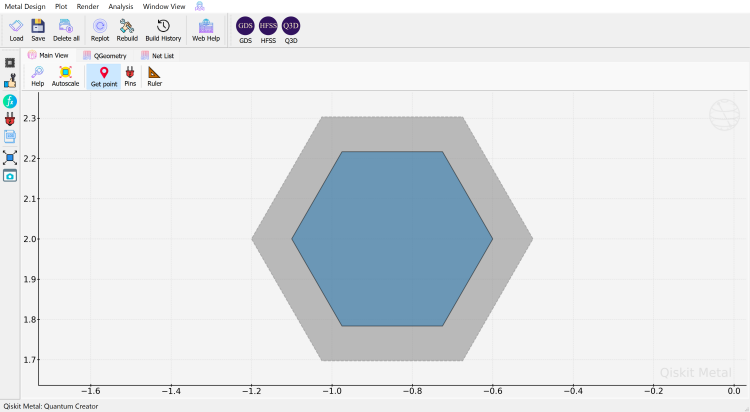

In [25]:
gui.zoom_on_components(['ngon_negative'])
gui.screenshot()

In [26]:
# Generate a circle with certain radius.
from qiskit_metal.qlibrary.sample_shapes.circle_raster import CircleRaster
display(CircleRaster.get_template_options(design))

ops = { 'radius': '10um',
        'pos_x': '-1.5mm',
        'pos_y': '2mm',
        'resolution': '16',
        'cap_style': 'round',
        'subtract': 'False',
        'helper': 'False',
        'chip': 'main',
        'layer': '1'}
CircleRaster(design, 'CircleRaster', ops)
gui.rebuild()

{'pos_x': '0.0um',
 'pos_y': '0.0um',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'radius': '300um',
 'resolution': '16',
 'cap_style': 'round',
 'subtract': 'False',
 'helper': 'False'}

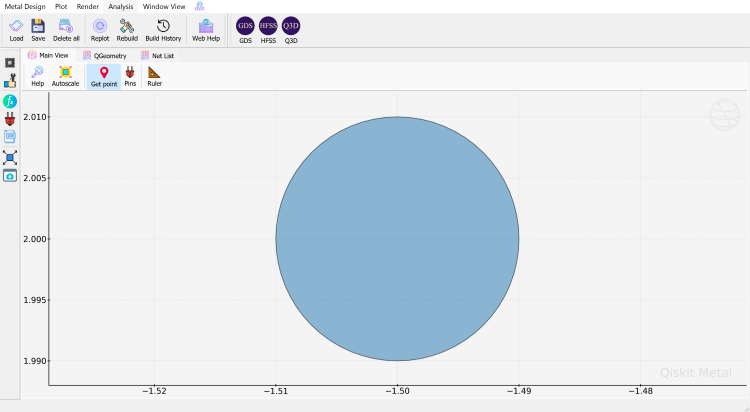

In [27]:
gui.zoom_on_components(['CircleRaster'])
gui.screenshot()

In [28]:
# Generate a hollow rectangle. Orientation is in degrees.
from qiskit_metal.qlibrary.sample_shapes.rectangle_hollow import RectangleHollow
display(RectangleHollow.get_template_options(design))

ops = { 'width': '500um',
        'height': '300um',
        'pos_x': '-2.3mm',
        'pos_y': '2mm',
        'orientation': '0',
        'subtract': 'False',
        'helper': 'False',
        'chip': 'main',
        'layer': '1',
        'inner': {  'width': '250um',
                    'height': '100um',
                    'offset_x': '40um',
                    'offset_y': '-20um',
                    'orientation': '15'}}
RectangleHollow(design, 'RectangleHollow', ops)
gui.rebuild()

{'pos_x': '0.0um',
 'pos_y': '0.0um',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'width': '500um',
 'height': '300um',
 'subtract': 'False',
 'helper': 'False',
 'inner': {'width': '250um',
  'height': '100um',
  'offset_x': '40um',
  'offset_y': '-20um',
  'orientation': '15'}}

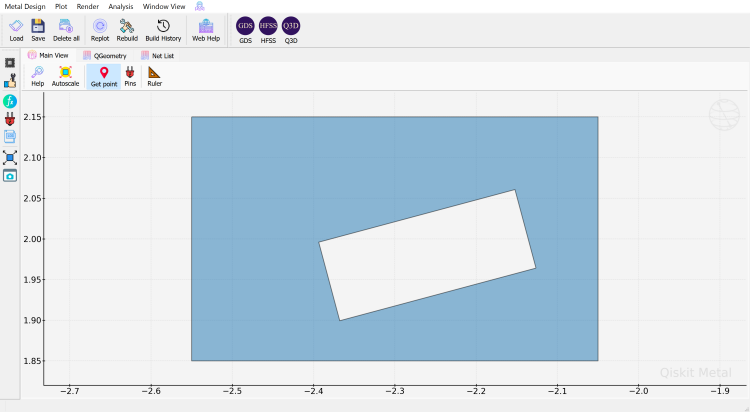

In [29]:
gui.zoom_on_components(['RectangleHollow'])
gui.screenshot()

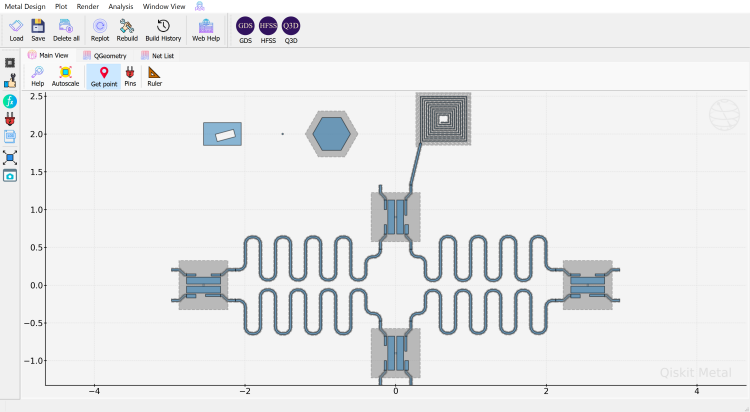

In [30]:
gui.autoscale()
gui.screenshot()

In [31]:
# Return the boundry box of the geometry, for example: q1.qgeometry_bounds().
# The function returns a tuple containing (minx, miny, maxx, maxy) bound values for the bounds of the component as a whole.
for name, qcomponent in design.components.items():
    print(f"{name:10s} : {qcomponent.qgeometry_bounds()}")

Q1         : [ 2.125 -0.325  2.975  0.325]
Q2         : [-0.325 -1.325  0.325 -0.475]
Q3         : [-2.975 -0.325 -2.125  0.325]
Q4         : [-0.325  0.475  0.325  1.325]
cpw1       : [ 0.2025     -0.63618364  2.125      -0.06881636]
cpw2       : [-2.125      -0.64243364 -0.2025     -0.06256636]
cpw3       : [-2.125       0.06881636 -0.2025      0.63618364]
cpw4       : [0.2025     0.06256636 2.125      0.64243364]
spiral     : [0.33  1.88  0.943 2.493]
spiral_cut : [0.28  1.83  0.988 2.538]
cpw_s1     : [0.2025 1.325  0.33   1.88  ]
ngon       : [-1.1         1.78349365 -0.6         2.21650635]
ngon_negative : [-1.2         1.69689111 -0.5         2.30310889]
CircleRaster : [-1.51  1.99 -1.49  2.01]
RectangleHollow : [-2.55  1.85 -2.05  2.15]


In [32]:
# We can get all the QGeometry of a QComponent. There are several kinds, such as path and poly. Let us look at all the polygons used to create qubit q1.
q1.qgeometry_table('poly')

,component,name,geometry,layer,subtract,helper,chip,fillet
0,1,pad_top,"POLYGON ((2.32500 0.01500, 2.77500 0.01500, 2....",1,False,False,main,NaN
1,1,pad_bot,"POLYGON ((2.32500 -0.10500, 2.77500 -0.10500, ...",1,False,False,main,NaN
2,1,rect_pk,"POLYGON ((2.22500 -0.32500, 2.87500 -0.32500, ...",1,True,False,main,NaN
3,1,a_connector_pad,"POLYGON ((2.65000 0.12000, 2.77500 0.12000, 2....",1,False,False,main,NaN
4,1,b_connector_pad,"POLYGON ((2.45000 0.12000, 2.32500 0.12000, 2....",1,False,False,main,NaN
5,1,c_connector_pad,"POLYGON ((2.57500 -0.12000, 2.77500 -0.12000, ...",1,False,False,main,NaN
6,1,d_connector_pad,"POLYGON ((2.45000 -0.12000, 2.32500 -0.12000, ...",1,False,False,main,NaN


In [33]:
q1.qgeometry_table('path')

,component,name,geometry,layer,subtract,helper,chip,width,fillet,hfss_wire_bonds,q3d_wire_bonds,aedt_q3d_wire_bonds,aedt_hfss_wire_bonds
0,1,a_wire,"LINESTRING (2.77500 0.13750, 2.80000 0.13750, ...",1,False,False,main,0.025,NaN,False,False,False,False
1,1,a_wire_sub,"LINESTRING (2.77500 0.13750, 2.80000 0.13750, ...",1,True,False,main,0.049,NaN,False,False,False,False
2,1,b_wire,"LINESTRING (2.32500 0.13750, 2.30000 0.13750, ...",1,False,False,main,0.025,NaN,False,False,False,False
3,1,b_wire_sub,"LINESTRING (2.32500 0.13750, 2.30000 0.13750, ...",1,True,False,main,0.049,NaN,False,False,False,False
4,1,c_wire,"LINESTRING (2.77500 -0.13750, 2.80000 -0.13750...",1,False,False,main,0.025,NaN,False,False,False,False
5,1,c_wire_sub,"LINESTRING (2.77500 -0.13750, 2.80000 -0.13750...",1,True,False,main,0.049,NaN,False,False,False,False
6,1,d_wire,"LINESTRING (2.32500 -0.13750, 2.30000 -0.13750...",1,False,False,main,0.025,NaN,False,False,False,False
7,1,d_wire_sub,"LINESTRING (2.32500 -0.13750, 2.30000 -0.13750...",1,True,False,main,0.049,NaN,False,False,False,False


In [34]:
q1.qgeometry_table('junction')

,component,name,geometry,layer,subtract,helper,chip,width,hfss_inductance,hfss_capacitance,...,hfss_mesh_kw_jj,q3d_inductance,q3d_capacitance,q3d_resistance,q3d_mesh_kw_jj,gds_cell_name,aedt_q3d_inductance,aedt_q3d_capacitance,aedt_hfss_inductance,aedt_hfss_capacitance
0,1,rect_jj,"LINESTRING (2.55000 -0.01500, 2.55000 0.01500)",1,False,False,main,0.02,10nH,0,...,0.000007,10nH,0,0,0.000007,my_other_junction,1.000000e-08,0,1.000000e-08,0


In [35]:
# Use this code to close the Qiskit Metal GUI. 
gui.main_window.close()

08:04AM 41s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  WARNING: QWindowsNativeFileDialogBase::selectNameFilter: Invalid parameter '*.metal.py' not found in 'All Files (*)'.

08:04AM 41s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  WARNING: QWindowsNativeFileDialogBase::selectNameFilter: Invalid parameter '*.metal.py' not found in 'All Files (*)'.



True